In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [3]:
# Read in data as pandas dataframe and display first 5 rows
df = pd.read_csv('/Users/iris/Desktop/cloudmile/project_a.csv')
#df.head()

# Feature Extraction
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["date"].dt.hour
df["dayofweek"] = df["date"].dt.dayofweek
df["quarter"] = df["date"].dt.quarter
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["dayofyear"] = df["date"].dt.dayofyear
df["sin_day"] = np.sin(df["dayofyear"])
df["cos_day"] = np.cos(df["dayofyear"])
df["dayofmonth"] = df["date"].dt.day
df["weekofyear"] = df["date"].dt.weekofyear

df = df.drop(["date", "year", "hour"], axis = 1)
print(df)

           cost      cost_3      cost_4      cost_5      cost_6      cost_7  \
0    242.017678         NaN         NaN         NaN         NaN         NaN   
1    269.161504         NaN         NaN         NaN         NaN         NaN   
2    276.920684  262.699955         NaN         NaN         NaN         NaN   
3    278.116592  274.732927  266.554115         NaN         NaN         NaN   
4    281.451098  278.829458  276.412469  269.533511         NaN         NaN   
..          ...         ...         ...         ...         ...         ...   
329  238.515404  248.623181  253.243823  253.689068  252.802794  251.782742   
330  254.545984  247.556977  250.103881  253.504255  253.831887  253.051821   
331  262.030980  251.697456  251.175478  252.489301  254.925376  255.003186   
332  263.436280  260.004415  254.632162  253.627638  254.313798  256.141219   
333  262.056440  262.507900  260.517421  256.117018  255.032439  255.419889   

     dayofweek  quarter  month  dayofyear   sin_day

/var/folders/8n/4zrtw6h1653b5dyztfhfqxlr0000gq/T/ipykernel_73253/3934239614.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["weekofyear"] = df["date"].dt.weekofyear


In [4]:
#Validation
train = df[:258]
validation = df[258:289]

# Train validation split
X_train = train.drop(["cost"], axis = 1)
y_train = train["cost"]
X_validation = validation.drop(["cost"], axis = 1)
y_validation = validation["cost"]

window = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

for each in window:
    prediction = []
    for i in range(31):
        rolling_train = train[-each:]
        X_train = rolling_train.drop(["cost"], axis = 1)
        y_train = rolling_train["cost"]
        rolling_validation = validation[i:i+1]
        X_validation = rolling_validation.drop(["cost"], axis = 1)
        
        # Model Training
        reg = RandomForestRegressor(n_estimators=1000)
        reg.fit(X_train, y_train)

        # Prediction
        yhat = reg.predict(X_validation)
        train = df[:258+i]
        prediction.append(yhat)
    
    # Model Evaluation
    from sklearn.metrics import mean_squared_error as MSE
    rmse = np.sqrt(MSE(y_validation, prediction))
    print(each, "RMSE: %f" %(rmse))

5 RMSE: 10.791302
10 RMSE: 10.438222
15 RMSE: 10.132019
20 RMSE: 9.807578
25 RMSE: 9.680810
30 RMSE: 7.884555
35 RMSE: 7.442900
40 RMSE: 6.874974
45 RMSE: 7.004419
50 RMSE: 6.718764
55 RMSE: 6.810947
60 RMSE: 6.549497
65 RMSE: 5.871588
70 RMSE: 5.946310
75 RMSE: 5.813147
80 RMSE: 6.285963
85 RMSE: 6.136797
90 RMSE: 6.214049


RMSE: 5.917832


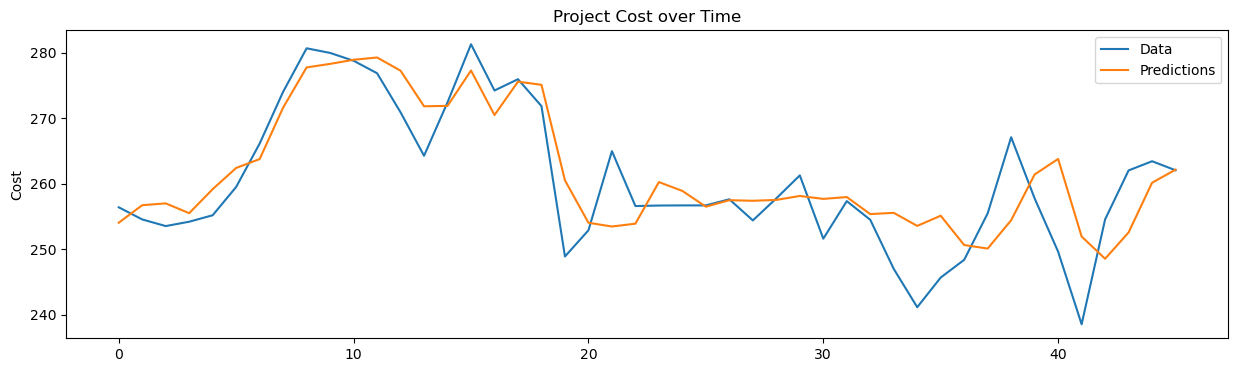

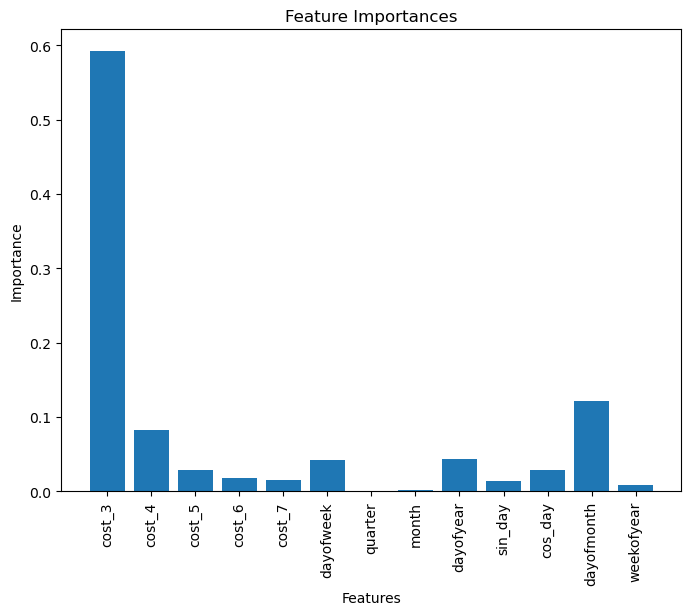

In [5]:
#Test
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

train = df[:288]
test = df[288:]

# Train test split
X_train = train.drop(["cost"], axis=1)
y_train = train["cost"]
X_test = test.drop(["cost"], axis=1)
y_test = test["cost"]

window_size = 75
prediction = []
lst_f = []
for i in range(46):
    rolling_train = train[-window_size:]
    X_train = rolling_train.drop(["cost"], axis=1)
    y_train = rolling_train["cost"]
    rolling_test = test[i:i+1]
    
    if rolling_test.shape[0] > 0:
        X_test = rolling_test.drop(["cost"], axis=1)
        
        # Model Training
        reg = RandomForestRegressor(n_estimators=1000)
        reg.fit(X_train, y_train)
        
        # Prediction
        yhat = reg.predict(X_test)
        prediction.append(yhat[0])  # Assuming yhat is a single value
        
        # Features
        element = reg.feature_importances_
        lst_f.append(element)
        
    else:
        prediction.append(0)  # Handle the case when rolling_test is empty
        
    train = df[:288+i]

# Ground truth vs. prediction
plt.figure(figsize=(15, 4))
plt.plot(y_test.values)
plt.plot(prediction)

plt.legend(('Data', 'Predictions'))
plt.title('Project Cost over Time')
plt.ylabel('Cost')

# Model Evaluation
rmse = np.sqrt(MSE(y_test, prediction))
print("RMSE: %f" % rmse)

# Features plot
lst_f = np.array(lst_f)
plot = np.mean(lst_f, axis=0)

# Bar plot of feature importances
plt.figure(figsize=(8, 6))
plt.bar(X_train.columns, plot)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()